# Solutions to exercises of Week 2 

*Disclaimer: this exercise is designed for you to practice with Python. The theory of mean-variance analysis is NOT part of the exam material. For this reason, most of derivations are skipped and the theory part is short.*

*Furthermore, this exercise is optional and should not be handed in. Unlike the assignment, the solution to these exercises will be shared and discussed, but it is strongly advised that you try on your own first.*

### Mean-variance optimization

We are interested in asset allocation, that is, how to construct an optimal portfolio of assets. We assume for simplicity that vector of $n$ stock returns is normally distributed with the mean vector $\mu$ and covariance matrix $\Sigma$, that is, $R \sim \mathcal{N}(\mu, \Sigma)$. Let us first read the data and obtain the vector of mean and covariance matrix, that will be needed for the analysis.

Import the relevant libraries:

In [1]:
# ! conda install -y pandas-datareader
# !pip install git+https://github.com/pydata/pandas-datareader.git
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

We are interested in [components of the Euro STOXX 50](https://en.wikipedia.org/wiki/EURO_STOXX_50#Composition). For that fetch data from the web using `pandas_datareader`: read the list of tickers provided below from `yahoo`, we need only `'Adj Close'` prices from January 2019 to October 2021.

In [2]:
tickers = ['ADS.DE','ADYEN.AS','AD.AS','AI.PA','AIR.PA','ALV.DE','AMS.MC','ABI.BR','ASML.AS','CS.PA',
           'BAS.DE','BAYN.DE','SAN.MC','BMW.DE','BNP.PA','CRG.IR','DAI.DE','BN.PA','DB1.DE','DPW.DE',
           'DTE.DE','ENEL.MI','ENGI.PA','ENI.MI','EL.PA','FLTR.IR','IBE.MC','ITX.MC','IFX.DE','INGA.AS',
           'ISP.MI','KER.PA','KNEBV.HE','OR.PA','LIN.DE','MC.PA','MUV2.DE','RI.PA','PHIA.AS','SAF.PA',
           'SAN.PA','SAP.DE','SU.PA','SIE.DE','TTE.PA','DG.PA','VIV.PA','VOW.DE','VNA.DE']
# UMG.AS and PRX.AS are excluded from the list since they have lots of missing data in yahoo 



Convert all the given closing prices into percentage log returns $r_t=100\log(P_t/P_{t-1})$ and drop all rows that contain at least one NaN:

In [3]:
# start = datetime.datetime(2019, 1, 1)
# end = datetime.datetime(2021, 10, 1)
# p = web.DataReader(tickers, 'yahoo', start, end)['Adj Close']
# p.tail()




In [4]:
from pandas_datareader._utils import RemoteDataError
from pandas_datareader.data import Options

start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021, 10, 1)

try:
    p = web.DataReader(tickers, 'yahoo', start, end)['Adj Close']
except:
    print("")
# except KeyError:
#     print("")
# except RemoteDataError:
#     print("")
# except SymbolWarning:
#     print("")


C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BAYN.DE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'DTE.DE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [ ]:
p.head()


Symbols,ADS.DE,ADYEN.AS,AD.AS,AI.PA,AIR.PA,ALV.DE,AMS.MC,CS.PA,BAS.DE,BAYN.DE,...,SAP.DE,SU.PA,SIE.DE,TTE.PA,DG.PA,VIV.PA,VOW.DE,VNA.DE,ABI.BR,ASML.AS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,176.473129,470.899994,19.947470,90.383278,80.368752,150.678268,59.910358,14.645017,48.283276,53.464622,...,82.001221,54.518482,88.764481,38.719513,65.734428,19.834459,125.426003,35.330860,NaN,NaN
2019-01-03,176.042480,463.049988,19.988066,88.722130,77.542427,149.094009,56.614510,14.523533,47.726646,53.411915,...,79.456650,53.008682,86.384277,38.387550,65.513588,19.657032,124.873466,35.428288,NaN,NaN
2019-01-04,182.837280,500.000000,20.154972,91.192558,81.275848,152.710281,58.564713,14.979876,50.247360,57.013706,...,81.464035,54.978786,89.769058,39.346088,66.783371,19.993210,129.754211,35.782574,NaN,NaN
2019-01-07,181.545319,531.200012,20.186550,90.681427,79.786301,151.470398,59.110767,14.912904,50.016758,56.108860,...,81.633667,54.739426,88.592537,39.254807,66.452133,20.207989,130.951370,35.941998,NaN,NaN
2019-01-08,185.947571,569.900024,20.376007,90.809212,82.736755,151.625397,60.612431,14.968972,50.271221,57.558361,...,82.905960,55.162907,88.945488,39.171818,67.298645,20.264019,132.240631,35.995144,NaN,NaN


In [ ]:
log_return = np.log(p) - np.log(p).shift(1)
log_return.head()

Symbols,ADS.DE,ADYEN.AS,AD.AS,AI.PA,AIR.PA,ALV.DE,AMS.MC,CS.PA,BAS.DE,BAYN.DE,...,SAP.DE,SU.PA,SIE.DE,TTE.PA,DG.PA,VIV.PA,VOW.DE,VNA.DE,ABI.BR,ASML.AS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.002443,-0.016811,0.002033,-0.018550,-0.035800,-0.010570,-0.056584,-0.008330,-0.011595,-0.000986,...,-0.031523,-0.028084,-0.027181,-0.008610,-0.003365,-0.008986,-0.004415,0.002754,NaN,NaN
2019-01-04,0.037871,0.076773,0.008316,0.027464,0.047024,0.023965,0.033867,0.030937,0.051468,0.065258,...,0.024950,0.036492,0.038435,0.024663,0.019197,0.016958,0.038341,0.009950,NaN,NaN
2019-01-07,-0.007091,0.060531,0.001566,-0.005621,-0.018497,-0.008152,0.009281,-0.004481,-0.004600,-0.015998,...,0.002080,-0.004363,-0.013193,-0.002323,-0.004972,0.010685,0.009184,0.004445,NaN,NaN
2019-01-08,0.023959,0.070322,0.009342,0.001408,0.036312,0.001023,0.025087,0.003753,0.005075,0.025506,...,0.015465,0.007707,0.003976,-0.002116,0.012658,0.002769,0.009797,0.001478,NaN,NaN


In [ ]:
log_return = log_return.dropna()
log_return

Symbols,ADS.DE,ADYEN.AS,AD.AS,AI.PA,AIR.PA,ALV.DE,AMS.MC,CS.PA,BAS.DE,BAYN.DE,...,SAP.DE,SU.PA,SIE.DE,TTE.PA,DG.PA,VIV.PA,VOW.DE,VNA.DE,ABI.BR,ASML.AS
Date,,,,,,,,,,,,,,,,,,,,,


Calculate the mean, standard deviation and covariance matrix of returns and save them to separate variables `mu`, `std` and `Sigma` respectively:

In [ ]:
mu = np.mean(log_return, axis = 0) ; mu
std = np.std(log_return, axis = 0) ; std
Sigma = log_return.cov()*252 ; Sigma #252 is the number of trading days in a year

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:8525: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Symbols,ADS.DE,ADYEN.AS,AD.AS,AI.PA,AIR.PA,ALV.DE,AMS.MC,CS.PA,BAS.DE,BAYN.DE,...,SAP.DE,SU.PA,SIE.DE,TTE.PA,DG.PA,VIV.PA,VOW.DE,VNA.DE,ABI.BR,ASML.AS
Symbols,,,,,,,,,,,,,,,,,,,,,
ADS.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADYEN.AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AD.AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AI.PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIR.PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALV.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMS.MC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CS.PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAS.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Make a scatterplot with `std` on the x-axis and `mu` on the y-axis. Make sure to add labels and a header. You can use `plt.scatter()` for that:

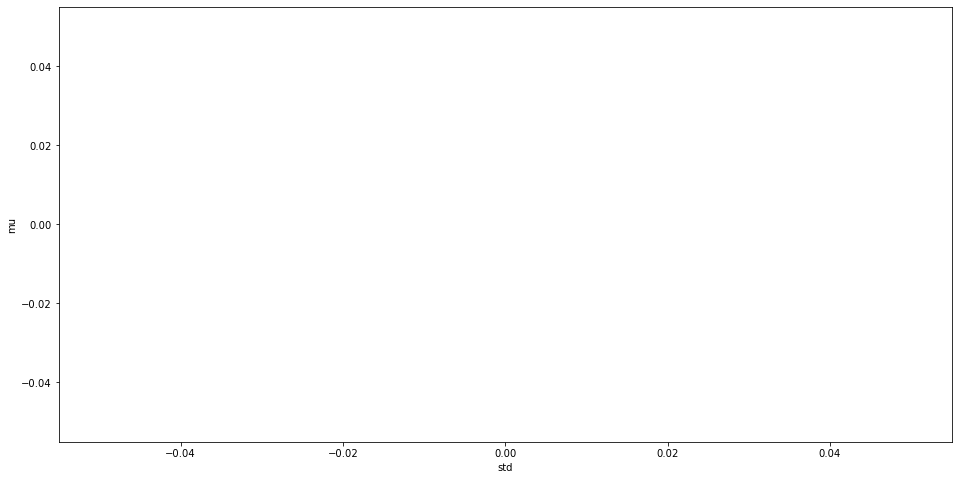

In [ ]:
import matplotlib
from matplotlib.pyplot import figure

plt.figure(figsize=(16, 8))
matplotlib.pyplot.scatter(std, mu, alpha=0.5)
plt.xlabel("std")
plt.ylabel("mu")
plt.show()





The mean-variance portfolio choice problem is to choose portfolio weights $w = (w_1, \dots, w_n)'$ that minimize the portfolio variance given the expected return on that portfolio. In other words, a portfolio is called (mean-variance) efficient if its risk is no larger than any other feasible portfolio of the same expected return. Mathematically, the problem could be formulated as 
$$ \min_w \frac{1}{2} w' \Sigma w \\ \mbox{s.t. } w'\mu = \bar{\mu}_p \mbox{ and } w'e=1$$

where $e = (1,\dots,1)'$ is $n \times 1$ vector of ones and $\bar{\mu}_p = w' \mu$ is the expected portfolio return.

This is a quadratic optimization problem, which can be solved analytically in this case. The solution yields the following optimal portfolio weights:

$$ w_p = \lambda_1 \Sigma^{-1} \mu + \lambda_2 \Sigma^{-1} e $$ 

where $\lambda_1 = \frac{C \bar{\mu}_p - A}{D}$ and  $\lambda_2 = \frac{B - A \bar{\mu}_p}{D}$ with $A = \mu' \Sigma^{-1} e, B = \mu' \Sigma^{-1} \mu, C = e' \Sigma^{-1} e$ and $D=BC - A^2$.

The minimized portfolio variance is then
$$\sigma_p^2 = w_p' \Sigma w_p = \lambda_1 \bar{\mu}_p + \lambda_2 = \frac{1}{C} + \frac{C}{D} \left( \bar{\mu}_p - \frac{A}{C}\right)^2$$

A set of all pairs $(\sigma_p, \bar{\mu}_p)$, where $\sigma_p$ is the solution to optimization problem for a given expected return $\bar{\mu}_p$, is referred to as mean-variance efficient frontier.

Make a function `MV_RiskyPortfolio` that accepts the mean vector `mu`, covariance matrix `Sigma` and the expected level of portfolio return `mu_p` and returns the optimal portfolio weights and optimal portfolio variance.

*Hint:* use `@` (Python 3.x only) for matrix mulitplication and `np.linalg.inv` for matrix inversion.

In [ ]:
# Simulating 5000 portfolios
num_port = 5000
# Creating an empty array to store portfolio weights
all_wts = np.zeros((num_port, len(log_return.columns)))
# Creating an empty array to store portfolio returns
port_returns = np.zeros((num_port))
# Creating an empty array to store portfolio risks
port_risk = np.zeros((num_port))
# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

In [ ]:
print(all_wts)
print(port_returns)
print(port_risk)
print(sharpe_ratio)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
for i in range(num_port):
  wts = np.random.uniform(size = len(log_return.columns))
  wts = wts/np.sum(wts)
  
  # saving weights in the array
  
  all_wts[i,:] = wts
  
  # Portfolio Returns
  
  port_ret = np.sum(log_return.mean() * wts)
  port_ret = (port_ret + 1) ** 252 - 1
  
  # Saving Portfolio returns
  
  port_returns[i] = port_ret
  
  
  # Portfolio Risk
  
  port_sd = np.sqrt(np.dot(wts.T, np.dot(Sigma, wts)))
  
  port_risk[i] = port_sd
  
  # Portfolio Sharpe Ratio
  # Assuming 0% Risk Free Rate
  
  sr = port_ret / port_sd
  sharpe_ratio[i] = sr

Plot a mean-variance efficient frontier and the previous scatter plot in $\sigma_p$, $\bar{\mu}_p$ space